# HW 6: Model Evaluation

## Data and Module Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
%cd "/content/drive/MyDrive/CSC 310"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CSC 310


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

The dataset I'll be analysing contains 13 attributes of 178 wines, each of which belongs to one of three classes. These classes are the target variable.

In [3]:
wine = pd.read_csv("wine.csv")
print(wine.shape)
wine.head()

(178, 14)


,class,alcohol,malic acid,ash,ash alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Setup

In [4]:
features = wine.drop('class', axis = 1)
target = wine['class']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, shuffle = True, random_state = 2)

## Three Model Comparison

### Low Complexity Tree

Create a decision tree that only allows a single decision.

In [6]:
from sklearn import tree
simple_dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 1)
simple_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

With a training accuracy of 67% and a testing accuracy of 39%, this model guessed right barely better than one third of the time when looking at novel data.

In [7]:
from sklearn.metrics import accuracy_score
pred_train = simple_dtree.predict(X_train)
pred_test = simple_dtree.predict(X_test)
simple_train_accuracy = accuracy_score(y_train, pred_train)
simple_test_accuracy = accuracy_score(y_test, pred_test)
print("Training accuracy: {:3.2f}".format(simple_train_accuracy))
print("Testing accuracy: {:3.2f}".format(simple_test_accuracy))
print(simple_dtree.max_depth)

Training accuracy: 0.67
Testing accuracy: 0.39
1


Using entropy as the criterion, the model determines that flavanoids are the best way to separate the classes of wine.

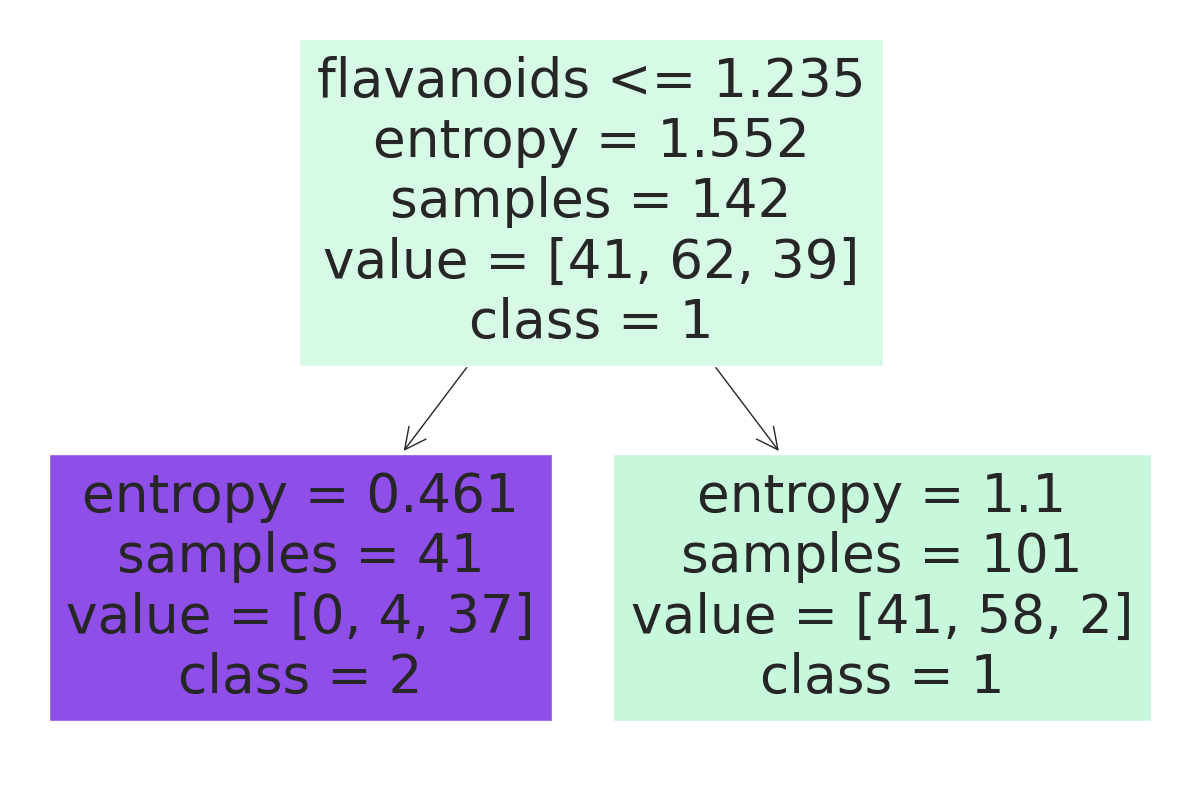

In [8]:
plt.figure(figsize = (15, 10))
tree.plot_tree(simple_dtree, filled = True, feature_names = features.columns, class_names = ['0', '1', '2'])
plt.show()

### Medium Complexity Tree

This time the model is allowed a depth of two decisions.

In [9]:
med_dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 1)
med_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

This model performs much better, 95% accurate with the training data (+38%), and 86% accurate on novel data (+47%).

In [10]:
pred_train = med_dtree.predict(X_train)
pred_test = med_dtree.predict(X_test)
medium_train_accuracy = accuracy_score(y_train, pred_train)
medium_test_accuracy = accuracy_score(y_test, pred_test)
print("Training accuracy: {:3.2f}".format(medium_train_accuracy))
print("Testing accuracy: {:3.2f}".format(medium_test_accuracy))
print(med_dtree.max_depth)

Training accuracy: 0.95
Testing accuracy: 0.86
2


Flavanoids remain the first variable used to make decisions, and in the second row we now consider color intensity for one group, and proline levels for another.

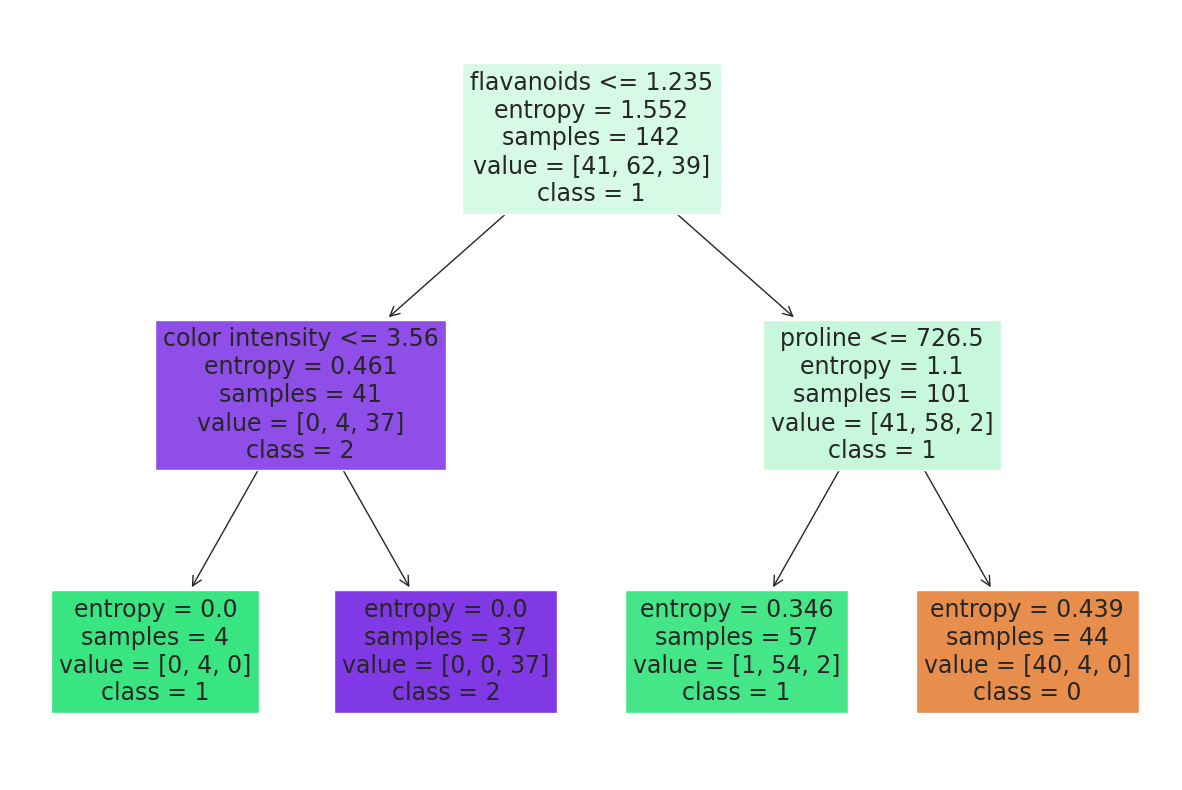

In [11]:
plt.figure(figsize = (15, 10))
tree.plot_tree(med_dtree, filled = True, feature_names = features.columns, class_names = ['0', '1', '2'])
plt.show()

### High Complexity Tree

Now comes the highest complexity tree, where there is no specified maximum depth. The model is free to go as deep as it sees fit.

In [12]:
complex_dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None, random_state = 1)
complex_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

The model adds three additional layers in order to perfectly classify its training data. Now the testing accuracy is up to 94% (+8%).

In [13]:
pred_train = complex_dtree.predict(X_train)
pred_test = complex_dtree.predict(X_test)
complex_train_accuracy = accuracy_score(y_train, pred_train)
complex_test_accuracy = accuracy_score(y_test, pred_test)
print("Training accuracy: {:3.2f}".format(complex_train_accuracy))
print("Testing accuracy: {:3.2f}".format(complex_test_accuracy))
print(complex_dtree.get_depth())

Training accuracy: 1.00
Testing accuracy: 0.94
5


This model's tree is a little bit surprising, the center right leaf node of the third layer had only three samples that weren't of class 2, but still needed three additional decisions in order to perfectly separate.

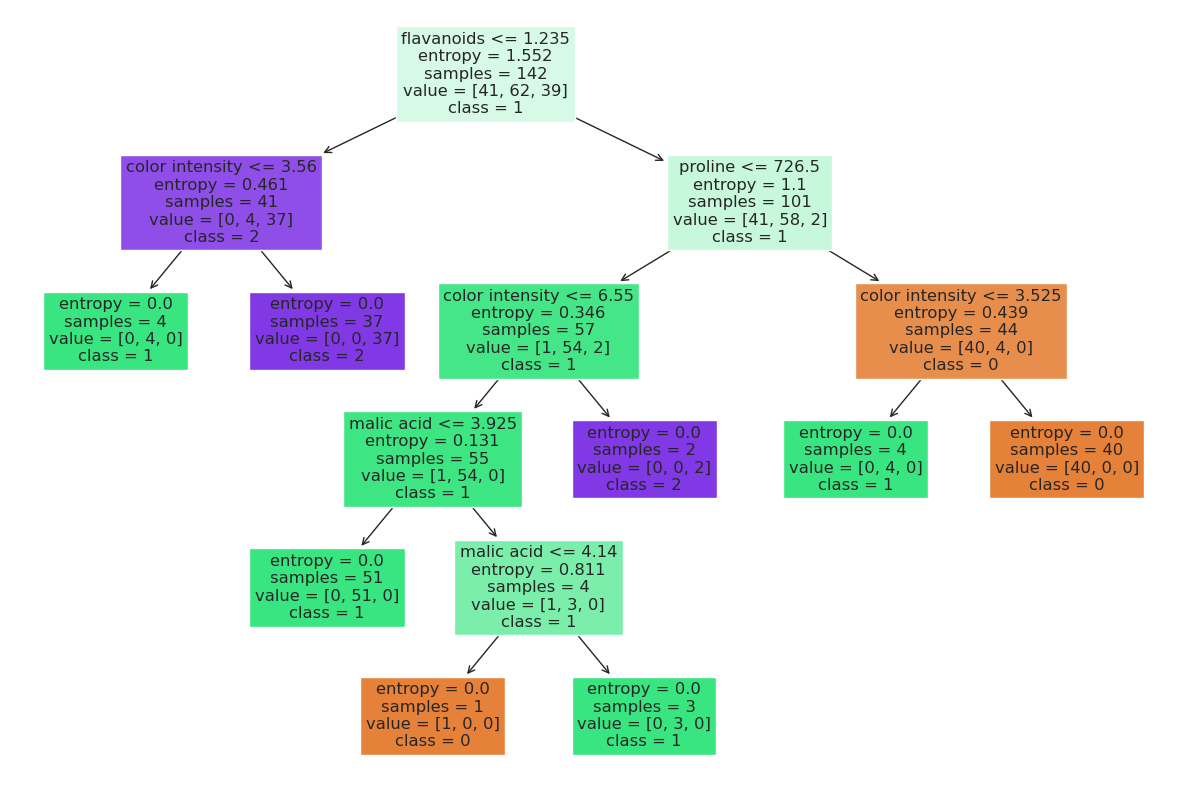

In [14]:
plt.figure(figsize = (15, 10))
tree.plot_tree(complex_dtree, filled = True, feature_names = features.columns, class_names = ['0', '1', '2'])
plt.show()

### Training Scores

Based on the training scores here (training in blue, testing in orange), the best model is (likely) the medium complexity model. The simplest, with only one decision, is hardly better than just guessing the class when working with unseen data. On the other hand, the other two are pretty close to each other and fairly accurate. However, the highest complexity model more than doubles the depth of the model while only becoming 8% more accurate.  
  
This may be worth it depending on the goals of the model, but typically doubling the complexity just to memorize the training data is not ideal. If we had a larger sample, perhaps the medium complexity model would come closer to equal, since it would generalize better.

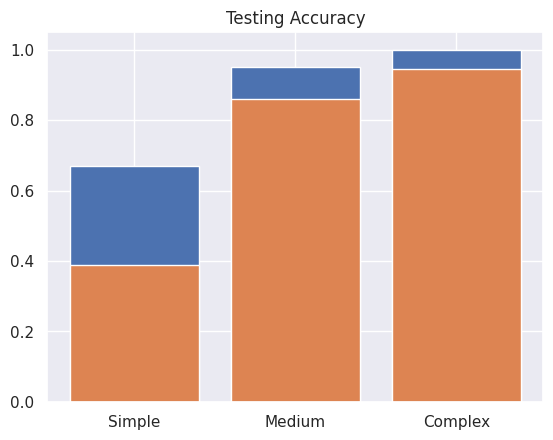

In [15]:
plt.bar(['Simple', 'Medium', 'Complex'], [simple_train_accuracy, medium_train_accuracy, complex_train_accuracy])
plt.title('Training Accuracy')
plt.bar(['Simple', 'Medium', 'Complex'], [simple_test_accuracy, medium_test_accuracy, complex_test_accuracy])
plt.title('Testing Accuracy')
plt.show()

## Cross-Validation

In [16]:
from sklearn.model_selection import KFold, GridSearchCV

cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

dtree = tree.DecisionTreeClassifier(random_state = 1)
param_grid = {
    'max_depth': list(range(1, 20)),
    'criterion': ['entropy', 'gini']
}
grid = GridSearchCV(dtree, param_grid, cv = cv)
grid.fit(X_train, y_train)

best_tree = grid.best_estimator_

print("The best parameters for the model: {}".format(grid.best_params_))
print("The best score for the model: {}".format(grid.best_score_))

The best parameters for the model: {'criterion': 'entropy', 'max_depth': 3}
The best score for the model: 0.923152709359606


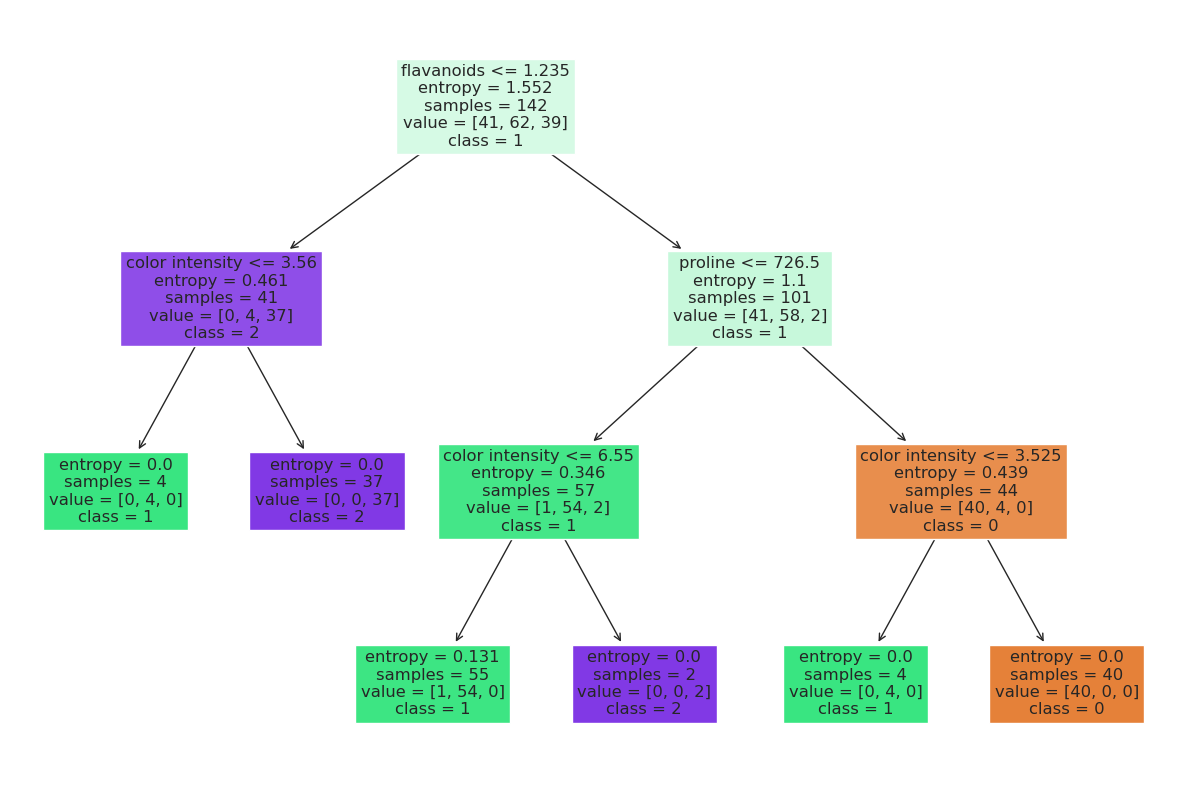

In [17]:
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
tree.plot_tree(best_tree, filled = True, feature_names = features.columns, class_names = ['0', '1', '2'])
plt.show()

## Confidence Interval

In [18]:
pred_test = best_tree.predict(X_test)
print("Testing accuracy of the best model: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Testing accuracy of the best model: 0.94


In [19]:
# Function for computing confidence intervals from class lecture

def classification_confint(acc, n):
  '''
  Compute the 95% confidence interval for a classification problem.
    acc -- classification accuracy
    n -- number of samples
  Returns a tuple (lb, ub) where lb is the lower bound and ub is the upper bound
  '''
  import math
  interval = 1.96 * math.sqrt((acc * (1 - acc)) / n)
  lb = max(0, acc - interval)
  ub = min(1.0, acc + interval)
  return (lb, ub)

In [20]:
lb, ub = classification_confint(accuracy_score(y_test, pred_test), len(y_test))
print("Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))
print("95% Confidence Interval of optimal model: ({:3.2f}, {:3.2f})".format(lb, ub))

Accuracy: 0.94
95% Confidence Interval of optimal model: (0.87, 1.00)


## Final Comparison

Despite an accuracy score that's 8% lower than the optimal model, the medium complexity tree from the first half of this notebook has a 95% confidence interval which overlaps a good deal with the optimal model's interval (overlapping from 87% to 97%). This alone means that you may want to lean towards the 'simpler' medium complexity model, but for two reasons I would stick with the optimal model.  
  
First, the confidence interval of the simpler model does range significantly lower than the optimal, all the way down to potentially 75%. The overlap means that it could potentially be better than the 'optimal', but it's worst case scenario is also much worse than anything the 'optimal' model is likely to return.  
Second, the 'simpler' model is actually only one layer shorter. Lots would depend on the context in which the model is used, but for this assignment's purposes, adding a single decision in order to potentially be more accurate doesn't sound computationally unreasonable. This isn't a hefty decision tree with many layers, it's just 3 quick decisions.  
Therefore, despite the difference in accuracy not being statistically significant, I would still pick the 'optimal' model, because of a better 'worst-case' scenario, and for minimal increase in computational overhead.

In [21]:
med_lb, med_ub = classification_confint(medium_test_accuracy, len(y_test))
print("Medium Complexity Accuracy: {:3.2f}".format(medium_test_accuracy))
print("95% Confidence Interval of medium complexity tree: ({:3.2f}, {:3.2f})".format(med_lb, med_ub))

print("\nOptimal Model Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))
print("95% Confidence Interval of optimal model: ({:3.2f}, {:3.2f})".format(lb, ub))

Medium Complexity Accuracy: 0.86
95% Confidence Interval of medium complexity tree: (0.75, 0.97)

Optimal Model Accuracy: 0.94
95% Confidence Interval of optimal model: (0.87, 1.00)
